# Udemy Courses Exploratory Data Analysis Solution

This notebook contains a step by step approach to performing an exploratory data analysis of dataset on Udemy courses.


## Workflow

The solution workflow goes through the following stages

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. EDA : Analyze, identify patterns, explore the data and visualize.
5. Report, and present the problem solving steps and final solution.
6. Submit the results.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.

- We may combine mulitple workflow stages. We may analyze by visualizing data.
- Perform a stage earlier than indicated. We may analyze data before and after wrangling.
- Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
- Drop a stage altogether. 


## Question
Instructions
Do an exploratory data analysis on the dataset provided to you and your team mates

Submit: 
    - Jupyter notebook (ipynb or html)
    - Report (docx)
    - Presentation(ppt) - includes: Hypothesis, Questions, Visualizations and Insights from the visualizations

## Workflow goals
In this study our objective is to find answers to the following questions:

1. What percentage of courses are paid and  free ?

2. What impact does the course duration have on the subscriber count ?

3. What is the relationship between the price of courses and the subscriber count ?

4. What effect does the number of reviews a course have on the subscriber count ?

5. Does the difficulty level of a course influence subscriber count?

6. Does the type of subject influence subscriber count?

7. Do people consider the number of lectures to subscribe for a course ?

8. Does the year and month a course is established influence subscriber count?

In [69]:
# Import Libraries
# data analysis and wrangling
import numpy as np
import pandas as pd
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 8,6 #this fixes that figure sizes of the diagrams

# Acquiring Data

The Python Pandas package helps us work with our datasets. We start by reading the dataset into Pandas DataFrames.

In [70]:
#Load the Udemy courses data
df = pd.read_csv('udemy_courses.csv')
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


# Wrangle, Prepare and Cleanse the data

## Analyze and understanding the data

In [71]:
print(df.columns)

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')


In [72]:
print("There are {} rows and {} columns in our Udemy dataset.".format(df.shape[0], df.shape[1]))

There are 3678 rows and 12 columns in our Udemy dataset.


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
course_id              3678 non-null int64
course_title           3678 non-null object
url                    3678 non-null object
is_paid                3678 non-null bool
price                  3678 non-null int64
num_subscribers        3678 non-null int64
num_reviews            3678 non-null int64
num_lectures           3678 non-null int64
level                  3678 non-null object
content_duration       3678 non-null float64
published_timestamp    3678 non-null object
subject                3678 non-null object
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.7+ KB


- Number of features/columns are 12
- Number of observations/rows are 3,678
- There are two categorical variables i.e. is_paid and subject
- There are Six numerical variables: Continuous-[price and content duration] and Discrete-[course_id, num_subscribers, num_reviews and num_lectures]
- There is one ordinal variable i.e level
- Two long text type variables i.e course_title and url
- And one timestamp variable i.e published_timestamp

In [74]:
#preview the data
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [75]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [76]:
df.describe(include=['O'])

,course_title,url,level,published_timestamp,subject
count,3678,3678,3678,3678,3678
unique,3663,3672,4,3672,4
top,Acoustic Blues Guitar Lessons,https://www.udemy.com/microstation-celulas/,All Levels,2016-05-16T18:28:30Z,Web Development
freq,3,2,1929,2,1200


What is the distribution of categorical features?

- Level takes four possible values: All level, Beginner, Intermediate and Expert
- Also there are four main categories of subject : Business Finance, Web Development, Graphic Design and Musical Instruments
- published timestamp has the format - '%Y-%m-%dT%H:%M:%SZ'

## Correcting Datatypes, Missing values and Duplicates

In [77]:
# Change is_paid datatype into int
df['is_paid'] = df[['is_paid']].astype('int')

In [78]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [79]:
# Checking for missing values
df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [80]:
# Look for duplicate rows based on course-id and course_title
df_dupli= df[df.duplicated(subset=['course_id','course_title']) == True]
df_dupli

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,1,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,1,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,1,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,1,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,1,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,1,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development


- Changed the is_paid from boolean into int
- There are no NAN/NULL values in the dataset
- There were no meaningful duplicates in the dataset


## Feature Engineering

- Does the length of a course_title matter?
It is interesting to explore whether there is some relationship between how lengthy the title of a course is and number of subscribers. Hence we will create a new column i.e title_length.

- How is the number of published courses changing over time? In which months do we have the most publishes?
In order to answer these questions, we will have to extract the year and month from the published_timestamp variable.



In [81]:
# A function to calculate the length of course title
# Feature engineering
def course_title_len(col):
    len_list = []
    for i in range(len(col)):
        len_list.append(len(col[i]))
    return len_list

In [82]:
#Create a new column title_length
df['title_length'] = course_title_len(df['course_title'])

In [83]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,title_length
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,34
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,59
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,56
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,50
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,44


In [84]:
df[['title_length']].dtypes

title_length    int64
dtype: object

In [85]:
# Extract date, month and year from the published_timestamp

date = df.published_timestamp 
date = date.astype('str') #to ensure all instances are strings

datetime_format = '%Y-%m-%dT%H:%M:%SZ'
published_date = []
published_month = []
published_year = []

for d in range(len(date)):
    published_date.append(datetime.strptime(date[d], datetime_format).date())
    published_month.append(datetime.strptime(date[d], datetime_format).month)
    published_year.append(datetime.strptime(date[d], datetime_format).year)

In [86]:
#Create new columns: published_date, published_year,published_month
df[['published_date']] = pd.DataFrame(published_date)
df[['published_year']] = pd.DataFrame(published_year)
df[['published_month']] = pd.DataFrame(published_month)

In [87]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,title_length,published_date,published_year,published_month
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,34,2017-01-18,2017,1
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,59,2017-03-09,2017,3
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,56,2016-12-19,2016,12
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,50,2017-05-30,2017,5
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,44,2016-12-13,2016,12


## Remove Redundant Variables

In [88]:
# drop redundant features
col_drop = ['course_id','url', 'published_timestamp']
df = df.drop(col_drop, axis=1)


We have :
- created a title_length variable (int)
- created published_date, published_year, published_month variables
- Dropped the following variables: course_id, url, published_timestamp

Now we proceed to the Exploratory Data Analysis!

In [89]:
df.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,title_length,published_date,published_year,published_month
0,Ultimate Investment Banking Course,1,200,2147,23,51,All Levels,1.5,Business Finance,34,2017-01-18,2017,1
1,Complete GST Course & Certification - Grow You...,1,75,2792,923,274,All Levels,39.0,Business Finance,59,2017-03-09,2017,3
2,Financial Modeling for Business Analysts and C...,1,45,2174,74,51,Intermediate Level,2.5,Business Finance,56,2016-12-19,2016,12
3,Beginner to Pro - Financial Analysis in Excel ...,1,95,2451,11,36,All Levels,3.0,Business Finance,50,2017-05-30,2017,5
4,How To Maximize Your Profits Trading Options,1,200,1276,45,26,Intermediate Level,2.0,Business Finance,44,2016-12-13,2016,12


In [90]:
# Save cleaned data to csv
df.to_csv('cleanV3_udemy_courses.csv', index='False')

# Exploratory Data Analysis

Here we address your research questions with aim of proving our hypothesis by analyzing, identifying patterns,and visualizing the data.

## Paid or Free Courses?

What proportion of the courses are paid or free?



In [91]:
100.0 * df['is_paid'].value_counts()/ len(df)

1    91.571506
0     8.428494
Name: is_paid, dtype: float64

In [92]:
courses_charge=df['is_paid'].value_counts().reset_index()
fig12=px.pie(courses_charge,values='is_paid',names='index',title='Free Vs Paid courses')
fig12.update_layout(showlegend=True, width=600)
fig12.show()


From the above pie chart ,91.6% of courses are paid and 8.43% are free we can conclude that many courses offered are paid courses. 

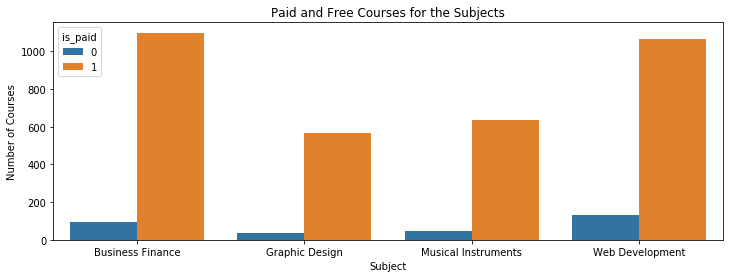

In [93]:
# Paid and Free Courses for the Subjects
plt.figure(figsize = (12,4))
sns.countplot(data = df, x = 'subject', hue = 'is_paid')
plt.title('Paid and Free Courses for the Subjects')
plt.ylabel('Number of Courses')
plt.xlabel('Subject')
plt.show()

## Is there a relationship between Content duration and Number of Subscribers ?

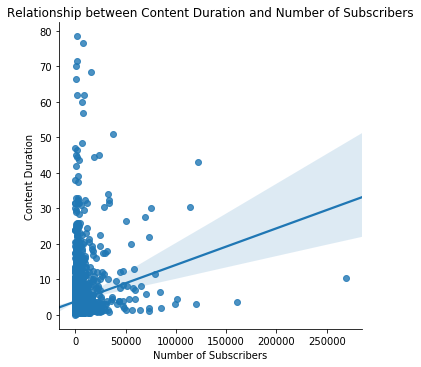

In [94]:
fig1 = sns.lmplot('num_subscribers','content_duration',data=df)
plt.ylabel('Content Duration')
plt.xlabel('Number of Subscribers')
plt.title('Relationship between Content Duration and Number of Subscribers')
plt.show(fig1)


In [95]:
df[['content_duration', 'num_subscribers']].corr()

,content_duration,num_subscribers
content_duration,1.000000,0.161839
num_subscribers,0.161839,1.000000


 There is a  weak positive/direct relationship between the number of subscribers and content duration.

## Analyzing the Subjects and Difficulty levels

### FINDING THE NUMBER OF SUBJECTS IN ALL

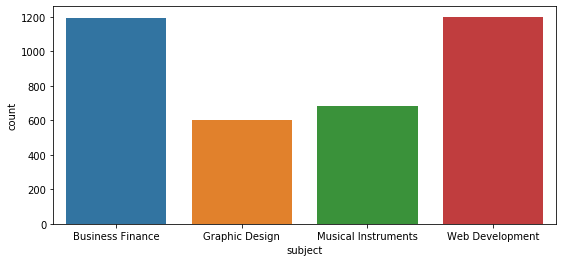

Majority of the courses fall under the Business Finance and the Web Development category.


In [96]:
plt.figure(figsize = (9,4))
sns.countplot(data = df, x = 'subject')
plt.show()

print("Majority of the courses fall under the Business Finance and the Web Development category.")



### FINDING THE LEVEL OF DIFFICULTY

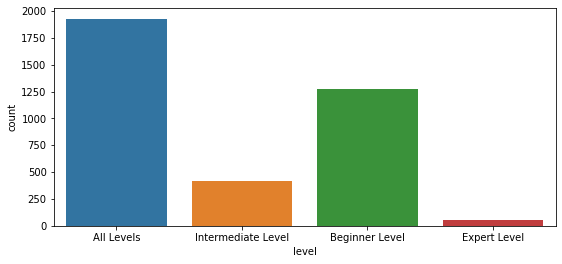

The above shows the level of difficulty of the courses on Udemy.


In [97]:
plt.figure(figsize = (9,4))
sns.countplot(data = df, x = 'level')
plt.show()

print("The above shows the level of difficulty of the courses on Udemy.")

### Level of Difficulty vrs the Number of Subscribers

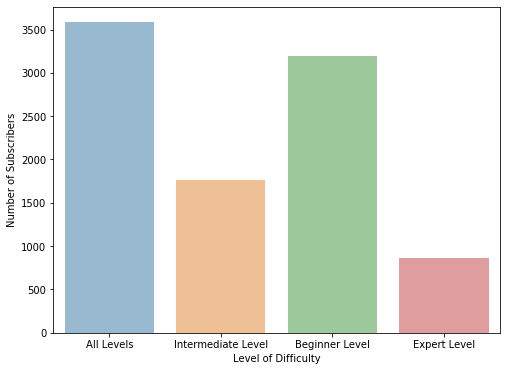

In [98]:
sns.barplot(x='level',y='num_subscribers', data= df, alpha= 0.5, ci=None)
plt.ylabel('Number of Subscribers')
plt.xlabel('Level of Difficulty')
plt.show()

We observe from the diagram that Expert and Intermediate level have the less number of subscribers. 
Many students subscribe to All levels and beginner level courses

### PUBLICATION YEAR OF EACH SUBJECTS

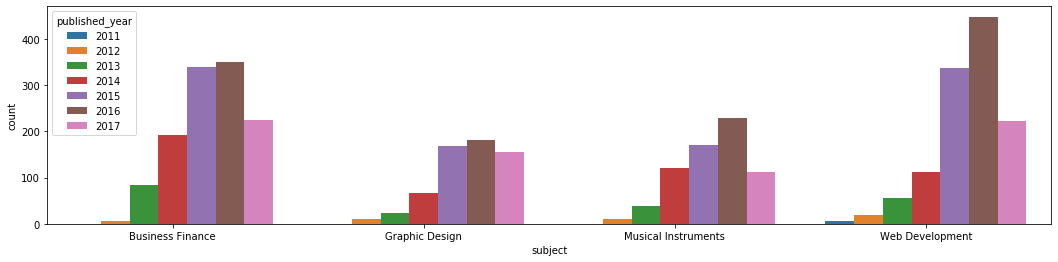

In [99]:
plt.figure(figsize = (18,4))
sns.countplot(data = df, x = 'subject', hue = 'published_year')
plt.show()

### SUBJECTS AND SUBSCRIBERS

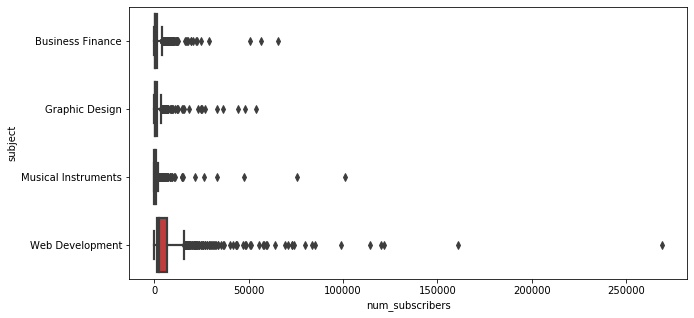

In [100]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'num_subscribers', y = 'subject', linewidth = 2.2, showfliers = True)
plt.show()

### DURATION OF EACH SUBJECT

In [101]:
df.groupby(['subject']).describe()['content_duration']

,count,mean,std,min,25%,50%,75%,max
subject,,,,,,,,
Business Finance,1195.0,3.552999,5.665659,0.000000,1.0,2.0,4.0,71.5
Graphic Design,603.0,3.580542,5.903737,0.500000,1.0,2.0,4.0,78.5
Musical Instruments,680.0,2.854387,3.470463,0.483333,1.0,2.0,3.5,38.0
Web Development,1200.0,5.594792,7.249553,0.500000,1.5,3.0,6.5,76.5


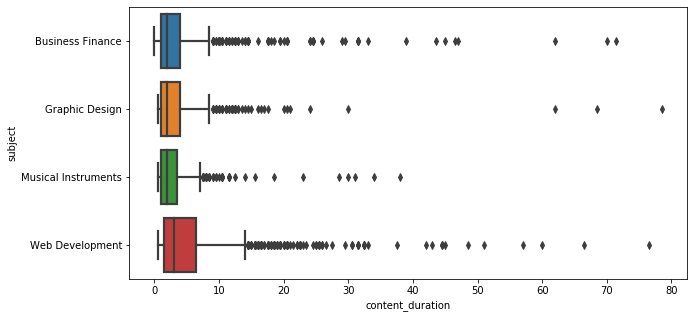

In [102]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'content_duration', y = 'subject', linewidth = 2.2, showfliers = True)
plt.show()

## Price vrs Number of reviews vrs Number of Subscribers

### Pricing of subjects

In [103]:
df.groupby(['subject']).describe()['price']

,count,mean,std,min,25%,50%,75%,max
subject,,,,,,,,
Business Finance,1195.0,68.552301,64.379824,0.0,20.0,45.0,95.0,200.0
Graphic Design,603.0,57.827529,57.211708,0.0,20.0,30.0,80.0,200.0
Musical Instruments,680.0,49.558824,41.187592,0.0,20.0,40.0,50.0,200.0
Web Development,1200.0,77.033333,66.080477,0.0,20.0,50.0,115.0,200.0


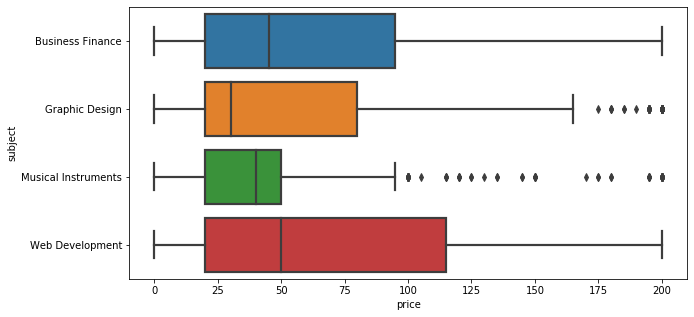

In [104]:
# Pricing of subjects
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x = 'price', y = 'subject', linewidth = 2.2)
plt.show()

### Relationship Analysis

In [105]:
#Correlation analysis is a statistical method used to evaluate the strength of relationship between two quantitative variables. 
#A high correlation means that two or more variables have a strong relationship with each other, while a weak correlation means that the variables are hardly related

correlation = df.corr()
correlation

,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,title_length,published_year,published_month
is_paid,1.000000,0.328513,-0.266159,-0.087471,0.112574,0.094417,0.033770,-0.017609,0.034718
price,0.328513,1.000000,0.050769,0.113696,0.330160,0.293450,0.156214,0.132990,0.038389
num_subscribers,-0.266159,0.050769,1.000000,0.649946,0.157746,0.161839,0.004444,-0.184574,0.015244
num_reviews,-0.087471,0.113696,0.649946,1.000000,0.243029,0.228889,-0.019958,-0.053318,0.006853
num_lectures,0.112574,0.330160,0.157746,0.243029,1.000000,0.801647,0.085339,-0.025085,0.031808
content_duration,0.094417,0.293450,0.161839,0.228889,0.801647,1.000000,0.048106,-0.058752,0.020887
title_length,0.033770,0.156214,0.004444,-0.019958,0.085339,0.048106,1.000000,0.052713,-0.005667
published_year,-0.017609,0.132990,-0.184574,-0.053318,-0.025085,-0.058752,0.052713,1.000000,-0.288077
published_month,0.034718,0.038389,0.015244,0.006853,0.031808,0.020887,-0.005667,-0.288077,1.000000


In [106]:
correlation['num_subscribers']

is_paid            -0.266159
price               0.050769
num_subscribers     1.000000
num_reviews         0.649946
num_lectures        0.157746
content_duration    0.161839
title_length        0.004444
published_year     -0.184574
published_month     0.015244
Name: num_subscribers, dtype: float64

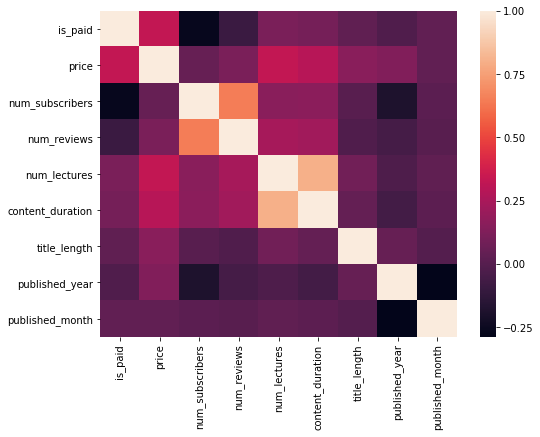

In [107]:
# We'd want to better visualize the correlation matrix of our data
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot = False)

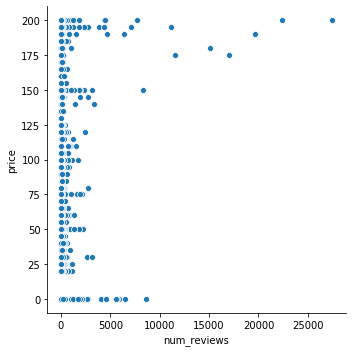

In [108]:
#This relational plot was to help us visualise the relationhip between the price and num_reviews
#The plot below shows no relation between these two vatiables and this quite evidence from their correlation coefficient; 0.11
sns.relplot( y ='price', x ='num_reviews', data = df) 

## Analysis of the published date and number of subscribers

### Published Year and Number of subscribers

In [109]:
year_sub = df[['published_year','num_subscribers', 'subject']].groupby(['published_year', 'subject'], as_index = False).sum()
year_sub

,published_year,subject,num_subscribers
0,2011,Web Development,119028
1,2012,Business Finance,3620
2,2012,Graphic Design,100649
3,2012,Musical Instruments,133635
4,2012,Web Development,317435
5,2013,Business Finance,311664
6,2013,Graphic Design,50133
7,2013,Musical Instruments,150224
8,2013,Web Development,1211417
9,2014,Business Finance,494623


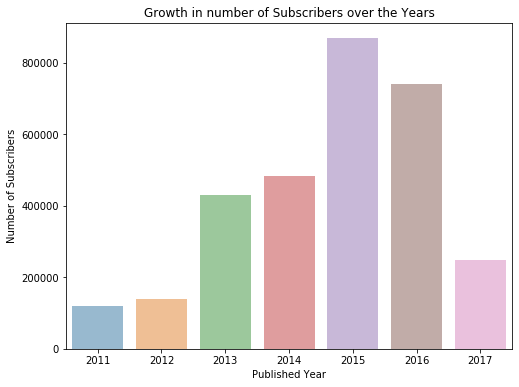

In [110]:
sns.barplot(x='published_year',y='num_subscribers', data= year_sub, alpha= 0.5, ci=None)
plt.ylabel('Number of Subscribers')
plt.xlabel('Published Year')
plt.title('Growth in number of Subscribers over the Years')
plt.show()

We observe an upward trend of the growth in subscribers from 2011 to 2015 (where it peaked at 3,475,324). The numbers begin to fall after 2015 with 2016 begin 2,966,644 and 2017 falls further to 988,941

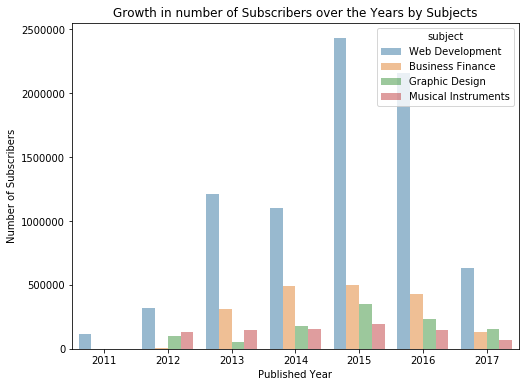

In [111]:
sns.barplot(x='published_year',y='num_subscribers', data= year_sub,hue='subject', alpha= 0.5, ci=None)
plt.ylabel('Number of Subscribers')
plt.xlabel('Published Year')
plt.title('Growth in number of Subscribers over the Years by Subjects')
plt.show()

We can see that in 2011 Web Development was the only course that had subscribers. The number of subsriptions to Web Development courses remained the highest over the years at peaking in 2015 at 2,430,242. Thhe second most subscribed subject is Business Finance followed by Graphic Design.

### Published Month and Number of Subscribers

In [112]:
month_sub = df[['published_month','num_subscribers','subject']].groupby(['published_month','subject'], as_index = False).sum()
month_sub

,published_month,subject,num_subscribers
0,1,Business Finance,169907
1,1,Graphic Design,142717
2,1,Musical Instruments,24118
3,1,Web Development,589799
4,2,Business Finance,191029
5,2,Graphic Design,72826
6,2,Musical Instruments,40644
7,2,Web Development,866539
8,3,Business Finance,163427
9,3,Graphic Design,92259


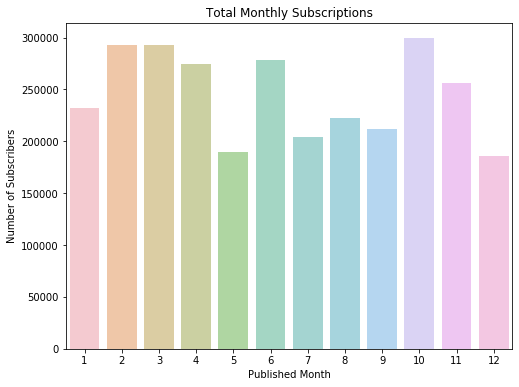

In [113]:
sns.barplot(x='published_month',y='num_subscribers', data= month_sub, alpha= 0.5, ci=None)
plt.ylabel('Number of Subscribers')
plt.xlabel('Published Month')
plt.title('Total Monthly Subscriptions')
plt.show()

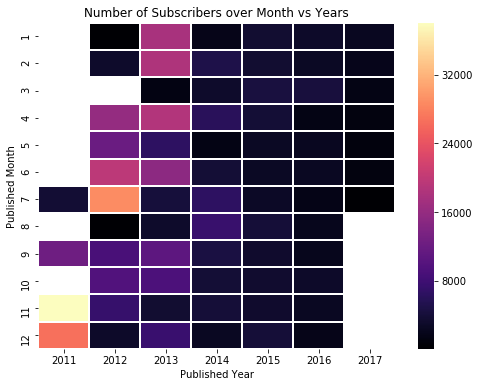

In [114]:
month_ = df.pivot_table(values='num_subscribers',index='published_month',columns='published_year')
sns.heatmap(month_,cmap='magma',linecolor='white',linewidths=1)
plt.ylabel('Published Month')
plt.xlabel('Published Year')
plt.title('Number of Subscribers over Month vs Years')
plt.show()

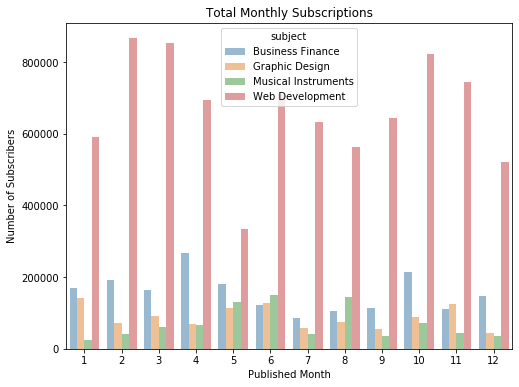

In [115]:
sns.barplot(x='published_month',y='num_subscribers', data= month_sub, hue='subject', alpha= 0.5, ci=None)
plt.ylabel('Number of Subscribers')
plt.xlabel('Published Month')
plt.title('Total Monthly Subscriptions')
plt.show()

Top three months with most subscriptions are:
- October : 1,197,429
- February : 1,171,038
- March : 1,169,973

The least are May with 758,727 and December with 743,480.


### Time series of Number of Subscribers 

In [116]:
time_series = df[['published_date','num_subscribers']].sort_values('published_date')
time_series.head()

,published_date,num_subscribers
2985,2011-07-09,3697
2491,2011-09-09,12458
2701,2011-11-19,69186
3082,2011-11-29,7014
2700,2011-12-20,26673


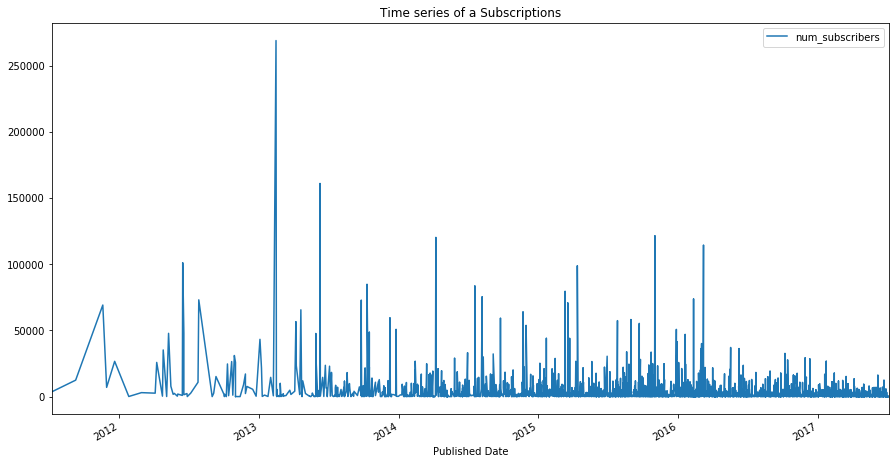

In [117]:
time_series.plot(x= 'published_date', y='num_subscribers', subplots=True, figsize=(15,8))
plt.xlabel('Published Date')
plt.title('Time series of a Subscriptions')
plt.show()

## Number of lectures and Number of Subscribers

### Correlation

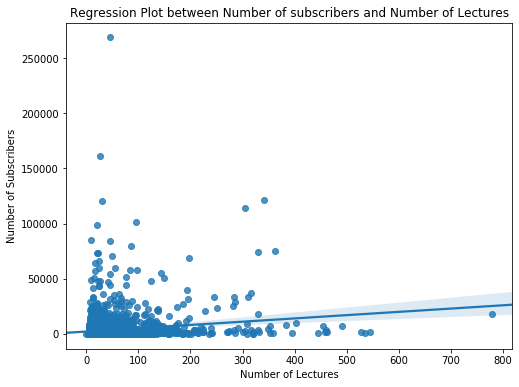

In [118]:
sns.regplot(x='num_lectures', y='num_subscribers', data=df)
plt.title('Regression Plot between Number of subscribers and Number of Lectures')
plt.ylabel('Number of Subscribers')
plt.xlabel('Number of Lectures')
plt.show()

In [119]:
# Correlation between number of lectures and number subscribers
df[['num_lectures', 'num_subscribers']].corr()

,num_lectures,num_subscribers
num_lectures,1.000000,0.157746
num_subscribers,0.157746,1.000000


The regplot shows that there is almost no linear relationship between the number of lectures and number of subscribers. With a correlation coefficient of 0.1577, we can assert that the number of lectures contained in a course does not significantly influence students decision of subscribing to a course.

### Correlation between number of lectures and number subscribers by subjects

In [120]:
# Business Finance
dfb = df[df.subject == 'Business Finance']
dfb[['num_lectures', 'num_subscribers']].corr()

,num_lectures,num_subscribers
num_lectures,1.000000,0.055364
num_subscribers,0.055364,1.000000


In [121]:
# Web Development
dfw = df[df.subject == 'Web Development']
dfw[['num_lectures', 'num_subscribers']].corr()

,num_lectures,num_subscribers
num_lectures,1.000000,0.126194
num_subscribers,0.126194,1.000000


In [122]:
# Graphic Design
dfg = df[df.subject == 'Graphic Design']
dfg[['num_lectures', 'num_subscribers']].corr()

,num_lectures,num_subscribers
num_lectures,1.000000,0.047529
num_subscribers,0.047529,1.000000


In [123]:
# Musical Instruments
dfm = df[df.subject == 'Musical Instruments']
dfm[['num_lectures', 'num_subscribers']].corr()

,num_lectures,num_subscribers
num_lectures,1.000000,0.277374
num_subscribers,0.277374,1.000000


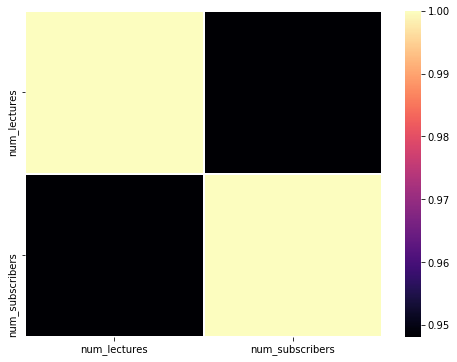

In [124]:
cor_bysub =  df[['subject','num_lectures','num_subscribers']].groupby(['subject'], as_index = False).sum()
sns.heatmap(cor_bysub.corr(),cmap='magma',linecolor='white',linewidths=1)


These correlation coefficients also confirms a weak to no linear relationship between number of lectures and number of subscribers. However this goes against our hypothesis that number of lectures influence number of subscribers.